In [1]:
# Set the kernel to "base (Python 3.11.6)"

# Precipitation data plot for station USC00050909 in Breckenridge, CO

# Import earthpy and pandas (as pd)
import earthpy 
import pandas as pd

In [2]:
# Configure the API to search for Breckenridge's percipitation data
# Rename the DataFrame to "breckenridge_prcp_df"
# Change station to USC00050909
# Change dataType to PRCP
# Change startDate to 1893-01-01
# Change endDate to 2025-07-31
breckenridge_prcp_df = pd.read_csv(
    'https://www.ncei.noaa.gov/access/services/data/v1'
    '?dataset=daily-summaries'
    '&dataTypes=PRCP'
    '&stations=USC00050848'
    '&startDate=1893-01-01'
    '&endDate=2025-07-31'
    '&units=standard',
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)
breckenridge_prcp_df

,STATION,PRCP
DATE,,
1893-10-01,USC00050848,0.94
1893-10-02,USC00050848,0.00
1893-10-03,USC00050848,0.00
1893-10-04,USC00050848,0.04
1893-10-05,USC00050848,0.00
...,...,...
2025-07-27,USC00050848,0.00
2025-07-28,USC00050848,0.00
2025-07-29,USC00050848,0.00


In [3]:
# Double check the download
breckenridge_prcp_df.head()

,STATION,PRCP
DATE,,
1893-10-01,USC00050848,0.94
1893-10-02,USC00050848,0.00
1893-10-03,USC00050848,0.00
1893-10-04,USC00050848,0.04
1893-10-05,USC00050848,0.00


In [4]:
# Rename "PRCP" to "Precipitation"
breckenridge_prcp_udf = breckenridge_prcp_df.rename(columns={
    'PRCP': 'Precipitation',
})

breckenridge_prcp_udf

,STATION,Precipitation
DATE,,
1893-10-01,USC00050848,0.94
1893-10-02,USC00050848,0.00
1893-10-03,USC00050848,0.00
1893-10-04,USC00050848,0.04
1893-10-05,USC00050848,0.00
...,...,...
2025-07-27,USC00050848,0.00
2025-07-28,USC00050848,0.00
2025-07-29,USC00050848,0.00


In [5]:
# Convert the precipitation units from inches to centimeters
breckenridge_prcp_udf['Precipitation'] = (
    (breckenridge_prcp_udf['Precipitation'] * 2.54))
breckenridge_prcp_udf

,STATION,Precipitation
DATE,,
1893-10-01,USC00050848,2.3876
1893-10-02,USC00050848,0.0000
1893-10-03,USC00050848,0.0000
1893-10-04,USC00050848,0.1016
1893-10-05,USC00050848,0.0000
...,...,...
2025-07-27,USC00050848,0.0000
2025-07-28,USC00050848,0.0000
2025-07-29,USC00050848,0.0000


<Axes: title={'center': 'Cumulative Precipitation Frequency in Breckenridge, CO'}, xlabel='Precipitation (cm)', ylabel='Frequency'>

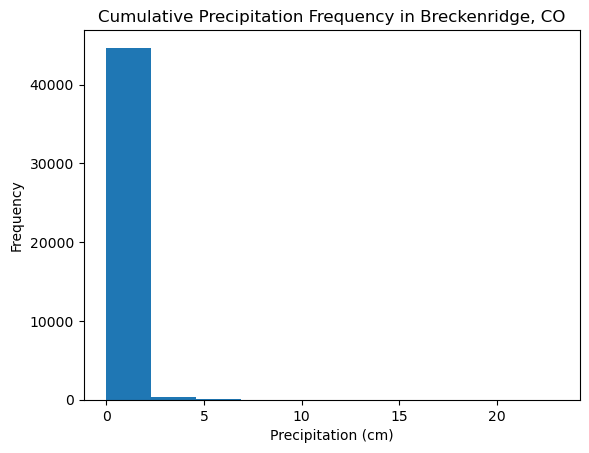

In [6]:
# Plot the cumulative precipitation frequency in Breckenridge, CO
# Add a title, label the axes, and remove the legend
# 
breckenridge_prcp_udf.plot.hist(
    title='Cumulative Precipitation Frequency in Breckenridge, CO',
    xlabel='Precipitation (cm)',
    ylabel='Frequency',
    legend=False
)

In [7]:
# Resample precipitation data from daily to annual using mean
# Rename breckenridge_prcp_udf to breckenridge_annual_prcp_df
breckenridge_annual_prcp_df = (
    breckenridge_prcp_udf
    .resample('YS')
    .mean('Year')
)
breckenridge_annual_prcp_df

,Precipitation
DATE,
1893-01-01,0.064880
1894-01-01,0.149457
1895-01-01,0.297407
1896-01-01,NaN
1897-01-01,0.175063
...,...
2021-01-01,0.143910
2022-01-01,0.130758
2023-01-01,0.159359


<Axes: title={'center': 'Average Annual Precipitation in Breckenridge, CO'}, xlabel='Year', ylabel='Average Annual Precipitation (cm)'>

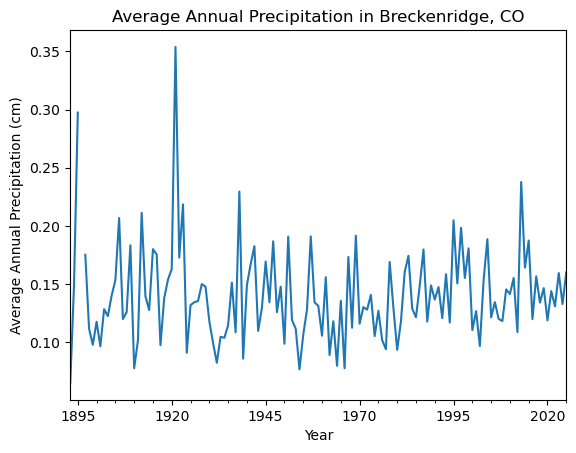

In [8]:
# Plot the average annual prcp in Breckenridge, CO
# Add a title, label the axes, and remove the legend

breckenridge_annual_prcp_df.plot(
    title='Average Annual Precipitation in Breckenridge, CO',
    xlabel='Year',
    ylabel='Average Annual Precipitation (cm)',
    legend=False
)

In [9]:
# Import the packages hvplot.pandas and holoviews (as hv)
import hvplot.pandas
import holoviews as hv

# Create an interactive plot of Breckenridge's annual precipitation
breckenridge_annual_prcp_plot = breckenridge_annual_prcp_df.hvplot(
    y='Precipitation',
    title='Average Annual Precipitation in Breckenridge, CO',
    ylabel='Average Annual Precipitation (cm)',
    xlabel='Year',
    legend=False,
    width=1000, height=500)
breckenridge_annual_prcp_plot

:Curve   [DATE]   (Precipitation)

In [10]:
# Import matplotlib.pyplot as plt and seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression

In [11]:
# Change the index from date to year and turn it into a column
breckenridge_annual_prcp_df.index.year.values

# Remove NaN values from input y (the temperature values)
# Rename the DataFrame to "breckenridge_clean_prcp_df"
breckenridge_clean_prcp_df = (
    breckenridge_annual_prcp_df.dropna(subset=['Precipitation'])
)
breckenridge_clean_prcp_df


# Reshape the "Year" column to be a 2D array for scikit-learn
X = breckenridge_clean_prcp_df.index.year.values.reshape(-1, 1)

# Get the temperature values using .values
y = breckenridge_clean_prcp_df['Precipitation'].values
 
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Obtain the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the slope and intercept
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: -3.7838355165716187e-06
Intercept: 0.14772193674339054


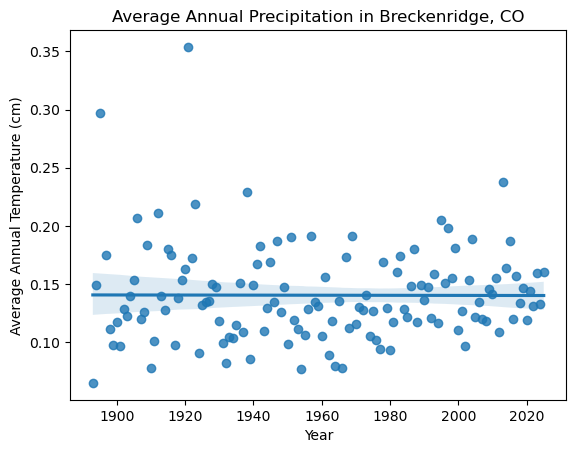

In [12]:
# Plot tne annual average prcp for Breckenridge with a trend line
ax = sns.regplot(
    x=breckenridge_clean_prcp_df.index.year,
    y=breckenridge_clean_prcp_df.Precipitation
)

# Label the title and axes
ax.set(
    title='Average Annual Precipitation in Breckenridge, CO',
    xlabel='Year',
    ylabel='Average Annual Temperature (cm)'
)

# Display the plot without extra text
plt.show()

In [13]:
# Save the imported precipitation data
breckenridge_clean_prcp_df.to_csv('breckenridge_precipitation_data')